# Notebook to Compare 2 R-Maps using Permutation
- Notes on controlling a regression:
    - Adding covariates to a regression will 'control' for them, but will almost always increase the R-squared. 
    - To 'remove' a covariate from the regression, you will want to regress a nuisance covariate OUT of the covariate of interest. 
        - This means your regressor will become the residuals from the regression of cov_1 ~ nuisance_cov1

# Get Dataset One

Import Niftis
- These are EXPECTED to have subject IDs which are IDENTICAL to the subject IDs that go in the covarite DF column names below
- Column labels are subject IDs. 
- This is expected to ultimately have the form:

|        |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |  10 | ... |  40 |  41 |  42 |  43 |  45 |  46 |  47 |  48 |  49 |  50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Voxel 1     | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |
| . . .      | ...         | ...        | ...         | ...         | ...         | ...         | ...         | ...         | ...         | ...          | ... | ...           | ...           | ...           | ...           | ...           | ...           | 7           | ...           | ...           | ...           |
| Voxel N     | 2          | 1         | 0         | 1         | 3         | 4         | 9         | 5         | 8         | 6          | ... | 6           | 3           | 8           | 8           | 4           | 9           | 9           | 2           | 2           | 4           |

In [1]:
import_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/shared_analysis/niftis_for_elmira/unsmoothed_atrophy_seeds_v2'
file_target = '*/*/unthresholded_tissue_segment_z_scores/*_cerebrospinal_fluid.nii'

In [2]:
from calvin_utils.file_utils.import_functions import GiiNiiFileImport
giinii = GiiNiiFileImport(import_path=import_path, file_column=None, file_pattern=file_target)
nimg_df = giinii.run()
nimg_df

/usr/local/Caskroom/mambaforge/base/envs/nimlab_py310/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Attempting to import from: /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/shared_analysis/niftis_for_elmira/unsmoothed_atrophy_seeds_v2/*/*/unthresholded_tissue_segment_z_scores/*_cerebrospinal_fluid.nii


,sub-0015_cerebrospinal_fluid.nii,sub-0012_cerebrospinal_fluid.nii,sub-0024_cerebrospinal_fluid.nii,sub-0023_cerebrospinal_fluid.nii,sub-0048_cerebrospinal_fluid.nii,sub-0046_cerebrospinal_fluid.nii,sub-0041_cerebrospinal_fluid.nii,sub-0022_cerebrospinal_fluid.nii,sub-0025_cerebrospinal_fluid.nii,sub-0013_cerebrospinal_fluid.nii,...,sub-0010_cerebrospinal_fluid.nii,sub-0032_cerebrospinal_fluid.nii,sub-0035_cerebrospinal_fluid.nii,sub-0003_cerebrospinal_fluid.nii,sub-0004_cerebrospinal_fluid.nii,sub-0050_cerebrospinal_fluid.nii,sub-0005_cerebrospinal_fluid.nii,sub-0002_cerebrospinal_fluid.nii,sub-0034_cerebrospinal_fluid.nii,sub-0033_cerebrospinal_fluid.nii
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Fix names

In [3]:
pre = 'sub-'
post = '_cerebros'

In [4]:
nimg_df = GiiNiiFileImport.splice_colnames(nimg_df, pre, post)
nimg_df

,0015,0012,0024,0023,0048,0046,0041,0022,0025,0013,...,0010,0032,0035,0003,0004,0050,0005,0002,0034,0033
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Import Covariates

**The CSV is expected to be in this format**
- sub column contents MUST match the names of the neuroimaging files above. 
    - ID column 
```
+-----+----------------------------+--------------+--------------+--------------+
| sub | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

In [5]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/metadata/atrophy_roi_scores/master_list_w_only_unthresholded.csv'
sheet= None #'FCS_Demographics_and_Behavior.c' #'Memory'

In [6]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/Figures/correlation_to_memory/comparison_of_hpc_peaks'

In [7]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()
data_df

,subject,Age,Sex,Cerebellum_WM_Wscore,Cortex_WM_Wscore,Subcortex_WM_Wscore,Temporal_WM_Wscore,WholeBrain_WM_Wscore,MTL_WM_Wscore,Occipital_WM_Wscore,...,Q7,Q8,Q9,Q10,Q11,Q12,Q14,TOTAL11,TOTALMOD,Diagnosis
0,1,65.230137,0.0,-20610.832540,-70339.034050,-53376.985520,-20185.464320,-145664.729700,-470.613228,-23102.618190,...,0.0,0,0.0,0.0,0.0,0.0,0.0,3.00,6.00,Control
1,2,70.578082,0.0,2765.060425,-17584.148380,-26300.293480,-3373.772445,-42094.822380,-37.815819,-4393.103538,...,0.0,5,0.0,0.0,0.0,0.0,0.0,9.00,13.00,Control
2,3,87.873973,1.0,-8792.022787,-92484.138980,-90743.572730,-22799.368760,-194937.684700,-821.514437,-20178.191490,...,6.0,#,0.0,1.0,0.0,0.0,1.0,24.00,35.00,MCI
3,4,79.934247,1.0,-9736.473769,-11011.932230,17747.896500,-517.970904,-1357.593538,528.475834,-5015.983389,...,0.0,5,0.0,0.0,0.0,0.0,1.0,9.67,17.67,Alzheimer
4,5,69.791781,0.0,7048.546383,5867.714162,4310.803429,7268.488353,17787.741390,434.390405,-250.276119,...,0.0,0,0.0,0.0,0.0,0.0,1.0,2.00,5.00,MCI
5,6,76.509589,1.0,8364.023861,12676.430820,25187.235790,6730.836797,47887.981630,475.053061,6793.849162,...,0.0,0,0.0,0.0,1.0,0.0,0.0,2.33,4.33,Alzheimer
6,7,81.169863,0.0,13107.339510,-4917.097893,5955.178044,1838.649728,14561.226050,76.438451,-12179.208510,...,0.0,3,0.0,0.0,0.0,0.0,0.0,5.00,7.00,MCI
7,8,82.646575,1.0,460.651185,-18651.317510,-16472.795760,-5605.871372,-34987.733460,-102.340751,-11993.318150,...,1.0,3,0.0,0.0,1.0,1.0,1.0,12.00,22.00,Alzheimer
8,9,77.347945,1.0,10023.712700,27766.219960,36098.489050,7516.597104,75716.340270,455.018907,11718.870060,...,0.0,2,0.0,0.0,1.0,0.0,0.0,10.33,14.33,MCI
9,10,79.712329,1.0,-14747.251470,-89236.535900,-95877.124510,-22948.525500,-202456.367800,-387.608419,-27311.688270,...,0.0,2,0.0,0.0,0.0,0.0,0.0,7.00,14.00,Control


In [8]:
variable_of_interest = 'Q4'

In [9]:
# data_df['subject'] = data_df['subject'].str[4:]
data_df

,subject,Age,Sex,Cerebellum_WM_Wscore,Cortex_WM_Wscore,Subcortex_WM_Wscore,Temporal_WM_Wscore,WholeBrain_WM_Wscore,MTL_WM_Wscore,Occipital_WM_Wscore,...,Q7,Q8,Q9,Q10,Q11,Q12,Q14,TOTAL11,TOTALMOD,Diagnosis
0,1,65.230137,0.0,-20610.832540,-70339.034050,-53376.985520,-20185.464320,-145664.729700,-470.613228,-23102.618190,...,0.0,0,0.0,0.0,0.0,0.0,0.0,3.00,6.00,Control
1,2,70.578082,0.0,2765.060425,-17584.148380,-26300.293480,-3373.772445,-42094.822380,-37.815819,-4393.103538,...,0.0,5,0.0,0.0,0.0,0.0,0.0,9.00,13.00,Control
2,3,87.873973,1.0,-8792.022787,-92484.138980,-90743.572730,-22799.368760,-194937.684700,-821.514437,-20178.191490,...,6.0,#,0.0,1.0,0.0,0.0,1.0,24.00,35.00,MCI
3,4,79.934247,1.0,-9736.473769,-11011.932230,17747.896500,-517.970904,-1357.593538,528.475834,-5015.983389,...,0.0,5,0.0,0.0,0.0,0.0,1.0,9.67,17.67,Alzheimer
4,5,69.791781,0.0,7048.546383,5867.714162,4310.803429,7268.488353,17787.741390,434.390405,-250.276119,...,0.0,0,0.0,0.0,0.0,0.0,1.0,2.00,5.00,MCI
5,6,76.509589,1.0,8364.023861,12676.430820,25187.235790,6730.836797,47887.981630,475.053061,6793.849162,...,0.0,0,0.0,0.0,1.0,0.0,0.0,2.33,4.33,Alzheimer
6,7,81.169863,0.0,13107.339510,-4917.097893,5955.178044,1838.649728,14561.226050,76.438451,-12179.208510,...,0.0,3,0.0,0.0,0.0,0.0,0.0,5.00,7.00,MCI
7,8,82.646575,1.0,460.651185,-18651.317510,-16472.795760,-5605.871372,-34987.733460,-102.340751,-11993.318150,...,1.0,3,0.0,0.0,1.0,1.0,1.0,12.00,22.00,Alzheimer
8,9,77.347945,1.0,10023.712700,27766.219960,36098.489050,7516.597104,75716.340270,455.018907,11718.870060,...,0.0,2,0.0,0.0,1.0,0.0,0.0,10.33,14.33,MCI
9,10,79.712329,1.0,-14747.251470,-89236.535900,-95877.124510,-22948.525500,-202456.367800,-387.608419,-27311.688270,...,0.0,2,0.0,0.0,0.0,0.0,0.0,7.00,14.00,Control


**Preprocess Your Data**

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [10]:
# data_df.columns

In [11]:
drop_list = [variable_of_interest]

In [12]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,subject,Age,Sex,Cerebellum_WM_Wscore,Cortex_WM_Wscore,Subcortex_WM_Wscore,Temporal_WM_Wscore,WholeBrain_WM_Wscore,MTL_WM_Wscore,Occipital_WM_Wscore,...,Q7,Q8,Q9,Q10,Q11,Q12,Q14,TOTAL11,TOTALMOD,Diagnosis
0,1,65.230137,0.0,-20610.832540,-70339.034050,-53376.985520,-20185.464320,-145664.729700,-470.613228,-23102.618190,...,0.0,0,0.0,0.0,0.0,0.0,0.0,3.00,6.00,Control
1,2,70.578082,0.0,2765.060425,-17584.148380,-26300.293480,-3373.772445,-42094.822380,-37.815819,-4393.103538,...,0.0,5,0.0,0.0,0.0,0.0,0.0,9.00,13.00,Control
3,4,79.934247,1.0,-9736.473769,-11011.932230,17747.896500,-517.970904,-1357.593538,528.475834,-5015.983389,...,0.0,5,0.0,0.0,0.0,0.0,1.0,9.67,17.67,Alzheimer
4,5,69.791781,0.0,7048.546383,5867.714162,4310.803429,7268.488353,17787.741390,434.390405,-250.276119,...,0.0,0,0.0,0.0,0.0,0.0,1.0,2.00,5.00,MCI
5,6,76.509589,1.0,8364.023861,12676.430820,25187.235790,6730.836797,47887.981630,475.053061,6793.849162,...,0.0,0,0.0,0.0,1.0,0.0,0.0,2.33,4.33,Alzheimer
6,7,81.169863,0.0,13107.339510,-4917.097893,5955.178044,1838.649728,14561.226050,76.438451,-12179.208510,...,0.0,3,0.0,0.0,0.0,0.0,0.0,5.00,7.00,MCI
7,8,82.646575,1.0,460.651185,-18651.317510,-16472.795760,-5605.871372,-34987.733460,-102.340751,-11993.318150,...,1.0,3,0.0,0.0,1.0,1.0,1.0,12.00,22.00,Alzheimer
8,9,77.347945,1.0,10023.712700,27766.219960,36098.489050,7516.597104,75716.340270,455.018907,11718.870060,...,0.0,2,0.0,0.0,1.0,0.0,0.0,10.33,14.33,MCI
9,10,79.712329,1.0,-14747.251470,-89236.535900,-95877.124510,-22948.525500,-202456.367800,-387.608419,-27311.688270,...,0.0,2,0.0,0.0,0.0,0.0,0.0,7.00,14.00,Control
10,11,76.923288,1.0,13470.006890,33871.111770,46029.444140,14974.777880,95092.397850,579.743092,6785.668274,...,8.0,3,0.0,0.0,0.0,0.0,0.0,18.00,23.00,MCI


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

Set the parameters for dropping rows

In [13]:
# column = 'redcap_event_name'  # The column you'd like to evaluate
# condition = 'not'  # Thecondition to check ('equal', 'above', 'below', 'not')
# value = '1year_arm_1' # The value to compare against

In [14]:
# data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
# data_df

Regress out a Covariate

In [15]:
# lis = []
# for col in data_df.columns:
#     if 'surface' in col.lower():
#         lis.append(col)
# print(lis)

In [16]:
# from calvin_utils.statistical_utils.regression_utils import RegressOutCovariates
## use this code block to regress out covariates. Generally better to just include as covariates in a model..
# dependent_variable_list = lis
# regressors = ['Age', 'Sex']

# data_df, adjusted_dep_vars_list = RegressOutCovariates.run(df=data_df, dependent_variable_list=dependent_variable_list, covariates_list=regressors)
# print(adjusted_dep_vars_list)

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [17]:
## Remove anything you don't want to standardize
# cols_not_to_standardize = ['Age',  'Subiculum_Connectivity_T']

In [18]:
# data_df = cal_palm.standardize_columns(cols_not_to_standardize)
# data_df

Choose Rows to Keep
- Keep your subject row and your dependent variable

In [19]:
col_to_keep_list = [variable_of_interest, 'subject']

- The final DF is EXPECTED to have subject IDs which are IDENTICAL to the subject IDs that go in the neuroimaging DF column names above
- There should only be 1 variable  the row

|        |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |  10 | ... |  40 |  41 |  42 |  43 |  45 |  46 |  47 |  48 |  49 |  50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Indep. Var.    | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |

In [20]:
data_df=data_df.loc[:, col_to_keep_list]
data_df = data_df.T
data_df.columns = data_df.loc['subject', :]
data_df = data_df.drop('subject')
data_df.dropna(inplace=True, axis=1)
data_df

subject,1.0,2.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,...,40.0,41.0,42.0,43.0,45.0,46.0,47.0,48.0,49.0,50.0
Q4,3.0,4.0,7.0,2.0,2.0,2.0,9.0,4.0,7.0,5.0,...,5.0,2.0,7.0,7.0,3.0,8.0,8.0,1.0,1.0,3.0


# Get Dataset Two

Import Niftis
- These are EXPECTED to have subject IDs which are IDENTICAL to the subject IDs that go in the covarite DF column names below
- Column labels are subject IDs. 
- This is expected to ultimately have the form:

|        |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |  10 | ... |  40 |  41 |  42 |  43 |  45 |  46 |  47 |  48 |  49 |  50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Voxel 1     | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |
| . . .      | ...         | ...        | ...         | ...         | ...         | ...         | ...         | ...         | ...         | ...          | ... | ...           | ...           | ...           | ...           | ...           | ...           | 7           | ...           | ...           | ...           |
| Voxel N     | 2          | 1         | 0         | 1         | 3         | 4         | 9         | 5         | 8         | 6          | ... | 6           | 3           | 8           | 8           | 4           | 9           | 9           | 2           | 2           | 4           |

In [21]:
import_path2 = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/shared_analysis/niftis_for_elmira/unsmoothed_atrophy_seeds_v2'
file_target2 = '*/*/unthresholded_tissue_segment_z_scores/*_grey_matter.nii'

In [22]:
from calvin_utils.file_utils.import_functions import GiiNiiFileImport
giinii2 = GiiNiiFileImport(import_path=import_path2, file_column=None, file_pattern=file_target2)
nimg_df2 = giinii2.run()
nimg_df2

Attempting to import from: /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/shared_analysis/niftis_for_elmira/unsmoothed_atrophy_seeds_v2/*/*/unthresholded_tissue_segment_z_scores/*_grey_matter.nii


,sub-0015_grey_matter.nii,sub-0012_grey_matter.nii,sub-0024_grey_matter.nii,sub-0023_grey_matter.nii,sub-0048_grey_matter.nii,sub-0046_grey_matter.nii,sub-0041_grey_matter.nii,sub-0022_grey_matter.nii,sub-0025_grey_matter.nii,sub-0013_grey_matter.nii,...,sub-0010_grey_matter.nii,sub-0032_grey_matter.nii,sub-0035_grey_matter.nii,sub-0003_grey_matter.nii,sub-0004_grey_matter.nii,sub-0050_grey_matter.nii,sub-0005_grey_matter.nii,sub-0002_grey_matter.nii,sub-0034_grey_matter.nii,sub-0033_grey_matter.nii
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Fix names

In [23]:
pre2 = 'sub-'
post2 = '_grey'

In [24]:
nimg_df2 = GiiNiiFileImport.splice_colnames(nimg_df2, pre2, post2)
nimg_df2

,0015,0012,0024,0023,0048,0046,0041,0022,0025,0013,...,0010,0032,0035,0003,0004,0050,0005,0002,0034,0033
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Import Covariates

**The CSV is expected to be in this format**
- sub column contents MUST match the names of the neuroimaging files above. 
    - ID column 
```
+-----+----------------------------+--------------+--------------+--------------+
| sub | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

In [25]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path2 = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/metadata/atrophy_roi_scores/master_list_w_only_unthresholded.csv'
sheet2 = None

In [26]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm2 = CalvinStatsmodelsPalm(input_csv_path=input_csv_path2, output_dir=out_dir, sheet=sheet2)
# Call the process_nifti_paths method
data_df2 = cal_palm2.read_and_display_data()

**Preprocess Your Data**

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [27]:
# data_df2.columns

In [28]:
drop_list2 = ['Q4']

In [29]:
data_df2 = cal_palm2.drop_nans_from_columns(columns_to_drop_from=drop_list2)
display(data_df2)

,subject,Age,Sex,Cerebellum_WM_Wscore,Cortex_WM_Wscore,Subcortex_WM_Wscore,Temporal_WM_Wscore,WholeBrain_WM_Wscore,MTL_WM_Wscore,Occipital_WM_Wscore,...,Q7,Q8,Q9,Q10,Q11,Q12,Q14,TOTAL11,TOTALMOD,Diagnosis
0,1,65.230137,0.0,-20610.832540,-70339.034050,-53376.985520,-20185.464320,-145664.729700,-470.613228,-23102.618190,...,0.0,0,0.0,0.0,0.0,0.0,0.0,3.00,6.00,Control
1,2,70.578082,0.0,2765.060425,-17584.148380,-26300.293480,-3373.772445,-42094.822380,-37.815819,-4393.103538,...,0.0,5,0.0,0.0,0.0,0.0,0.0,9.00,13.00,Control
3,4,79.934247,1.0,-9736.473769,-11011.932230,17747.896500,-517.970904,-1357.593538,528.475834,-5015.983389,...,0.0,5,0.0,0.0,0.0,0.0,1.0,9.67,17.67,Alzheimer
4,5,69.791781,0.0,7048.546383,5867.714162,4310.803429,7268.488353,17787.741390,434.390405,-250.276119,...,0.0,0,0.0,0.0,0.0,0.0,1.0,2.00,5.00,MCI
5,6,76.509589,1.0,8364.023861,12676.430820,25187.235790,6730.836797,47887.981630,475.053061,6793.849162,...,0.0,0,0.0,0.0,1.0,0.0,0.0,2.33,4.33,Alzheimer
6,7,81.169863,0.0,13107.339510,-4917.097893,5955.178044,1838.649728,14561.226050,76.438451,-12179.208510,...,0.0,3,0.0,0.0,0.0,0.0,0.0,5.00,7.00,MCI
7,8,82.646575,1.0,460.651185,-18651.317510,-16472.795760,-5605.871372,-34987.733460,-102.340751,-11993.318150,...,1.0,3,0.0,0.0,1.0,1.0,1.0,12.00,22.00,Alzheimer
8,9,77.347945,1.0,10023.712700,27766.219960,36098.489050,7516.597104,75716.340270,455.018907,11718.870060,...,0.0,2,0.0,0.0,1.0,0.0,0.0,10.33,14.33,MCI
9,10,79.712329,1.0,-14747.251470,-89236.535900,-95877.124510,-22948.525500,-202456.367800,-387.608419,-27311.688270,...,0.0,2,0.0,0.0,0.0,0.0,0.0,7.00,14.00,Control
10,11,76.923288,1.0,13470.006890,33871.111770,46029.444140,14974.777880,95092.397850,579.743092,6785.668274,...,8.0,3,0.0,0.0,0.0,0.0,0.0,18.00,23.00,MCI


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

Set the parameters for dropping rows

In [30]:
# column2 = 'City'  # The column you'd like to evaluate
# condition2 = 'not'  # Thecondition to check ('equal', 'above', 'below', 'not')
# value2 = 'Toronto' # The value to compare against

In [31]:
# data_df2, other_df2 = cal_palm2.drop_rows_based_on_value(column2, condition2, value2)
# data_df2

Regress out a Covariate

In [32]:
# lis = []
# for col in data_df2.columns:
#     if 'surface' in col.lower():
#         lis.append(col)
# print(lis)

In [33]:
from calvin_utils.statistical_utils.regression_utils import RegressOutCovariates
## use this code block to regress out covariates. Generally better to just include as covariates in a model..
# dependent_variable_list2 = lis
# regressors2 = ['Age', 'Sex']

# data_df2, adjusted_dep_vars_list2 = RegressOutCovariates.run(df=data_df2, dependent_variable_list=dependent_variable_list2, covariates_list=regressors2)
# print(adjusted_dep_vars_list2)

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [34]:
## Remove anything you don't want to standardize
# cols_not_to_standardize2 = ['Age',  'Subiculum_Connectivity_T']

In [35]:
# data_df2 = cal_palm2.standardize_columns(cols_not_to_standardize2)
# data_df2

Choose Rows to Keep
- Keep subject and dependent variable row

In [36]:
col_to_keep_list2 = ['Q4', 'subject']

- The final DF is EXPECTED to have subject IDs which are IDENTICAL to the subject IDs that go in the neuroimaging DF column names above
- There should only be 1 variable  the row

|        |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |  10 | ... |  40 |  41 |  42 |  43 |  45 |  46 |  47 |  48 |  49 |  50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Indep. Var.    | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |

In [37]:
data_df2=data_df2.loc[:, col_to_keep_list2]
data_df2 = data_df2.T
data_df2.columns = data_df2.loc['subject']
data_df2 = data_df2.drop('subject')
data_df2.dropna(inplace=True, axis=1)
data_df2

subject,1.0,2.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,...,40.0,41.0,42.0,43.0,45.0,46.0,47.0,48.0,49.0,50.0
Q4,3.0,4.0,7.0,2.0,2.0,2.0,9.0,4.0,7.0,5.0,...,5.0,2.0,7.0,7.0,3.0,8.0,8.0,1.0,1.0,3.0


# Define an Already Existing Map to Compare Similarity To
- if not using, set to None

In [38]:
map_path = None

# Test 2 Maps

# Prepare the Arguments for Permutation Testing

Is there a particular mask you want to use?
- MUST match the resolution of voxelwise data being analyzed. 
- If you set None, the voxelwise data will be used for thresholding. 
    - Values below mask_threshold (float) will be set to 0. 
- Warning: bad masking may result in failed experiments. Erroneous voxels outside the brain will influence the correction. 

In [39]:
mask_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/atlases/memory/hippocampus_2mm.nii'
mask_threshold = 0

Correlation method
- spearman or pearson

In [40]:
method = 'spearman'

Choose Max Stat Correction Method
- None | pseudo_var_smooth | var_smooth

In [41]:
max_stat_method = 'pseudo_var_smooth'

ROI to analyze within

In [42]:
roi_path = None
roi_threshold = 0

Initialize the Permutation testing Class

In [43]:
from calvin_utils.permutation_analysis_utils.correlation_fwe_comparison import CalvinFWEWrapper
wrapper = CalvinFWEWrapper(neuroimaging_dataframe1=nimg_df, 
                           variable_dataframe1=data_df, 
                           neuroimaging_dataframe2=nimg_df2, 
                           variable_dataframe2=data_df2, 
                           mask_threshold=mask_threshold, 
                           mask_path=mask_path, 
                           out_dir=out_dir, 
                           method=method, 
                           max_stat_method=max_stat_method,
                           roi_path=roi_path, roi_threshold=0,
                           map_path=map_path, use_spearman=True,
                           two_tail=True)

Analyze the Similarity of the 2 maps

In [44]:
# Running Pearson correlation analysis with ROI mask
observed_correlation, permuted_correlations = wrapper.run_pearson_analysis(n_permutations=10)

Running permutation: 100%|██████████| 10/10 [00:02<00:00,  3.65it/s]

Observed: 0.4402009157648613, p-value 0.9, using 2-tail: True.


Analyze the Distance between the Peaks of the Two Maps

In [45]:
# Running peak voxel finding analysis with ROI mask
# observed_peak_distance, permuted_peak_distances = wrapper.run_peak_voxel_analysis(n_permutations=1000)

Analyze the Magnitude between the Peaks of the Two Maps

In [53]:
# Running peak voxel finding analysis with ROI mask
observed_peak_delta, permuted_peak_deltas = wrapper.run_peak_corr_analysis(n_permutations=1000)

Running permutation: 100%|██████████| 1000/1000 [02:43<00:00,  6.12it/s]

Observed: [[0.23151403]], p-value [0.997], using 2-tail: True.


Bootstrap the Magnitude Between the Peaks of the Two maps

In [48]:
# observed_peak_difference, bootstrapped_dist = wrapper.bootstrap_peak_corr(n_permutations=1000)

Running bootstraps: 100%|██████████| 1000/1000 [02:44<00:00,  6.07it/s]

Observed: [[0.23151403]], p-value [1.], using 2-tail: True.


In [58]:
import pandas as pd
csf_wm = pd.DataFrame(permuted_peak_deltas)

<AxesSubplot: >

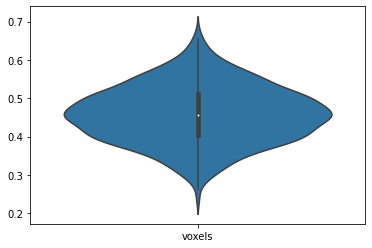

In [64]:
import seaborn as sns
sns.violinplot(csf_wm + 0.5)

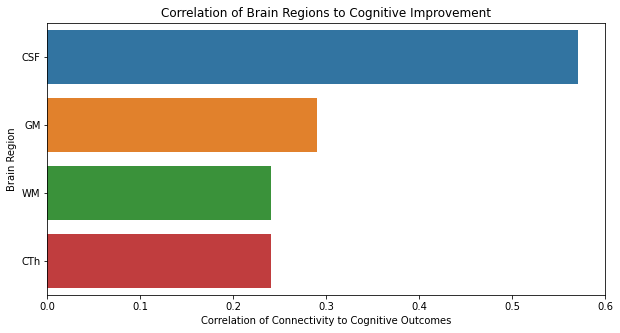

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data
dvals = {'CSF': [0.57], 
         'GM': [0.29],
         'WM': [0.24],
         'CTh': [0.24]}
df = pd.DataFrame(dvals).T.reset_index()
df.columns = ['Region', 'Value']

# Plot
plt.figure(figsize=(10, 5))  # Adjust width and height for the desired length
sns.barplot(data=df, x='Value', y='Region', palette='tab10')
plt.xlim(0, 0.6)  # Set x-axis range
plt.xlabel('Correlation of Connectivity to Cognitive Outcomes')
plt.ylabel('Brain Region')
plt.title('Correlation of Brain Regions to Cognitive Improvement')
plt.grid(False)
plt.savefig('/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/Figures/correlation_to_memory/barplot.svg')

plt.show()


CSF vs GM: Observed: [[0.00518039]], p-value [0.054], using 2-tail: True.

CSF vs WM: Observed: [[0.23151403]], p-value [0.994], using 2-tail: True.

CSF vs CTh: Observed: [[0.2300000]], p-value [0.992], using 2-tail: True.